# Book Recommender System 
# by Anzhelika Simonyan, Armen Mkrtumyan, Diana Tumasyan, Anzhela Davityan

# Data Preproecessing

## Including necessary libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests #For loading the dictionary of English words

## General idea about the dataset

In [132]:
data = pd.read_csv('Raw_Dataset - Sheet1.csv')

In [133]:
#data["Քաղաք/Գյուղ"].to_csv("Qaxaqgyux.csv")

In [134]:
data

,Սեռ,Բնակության վայրը,Քաղաք/Գյուղ,Տարիք,Արկածային,Բանաստեղծություններ,Դասական,Կոմիքս,Դետեկտիվ.,Դրամա,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
0,Աղջիկ,Երևան,Երևան,12-14,Արկածային,NaN,Դասական,Կոմիքս,Դետեկտիվ.,Դրամա,...,Հերման Հեսսե,Վարդկես Պետրոսյան,Վիլյամ Սարոյան,Այդ Ալյեն,NaN,NaN,NaN,NaN,NaN,NaN
1,Աղջիկ,Երևան,NaN,23+,Արկածային,NaN,Դասական,NaN,Դետեկտիվ.,NaN,...,Томас Гарди,Драйзер,Франк Тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Աղջիկ,Տավուշ,Նոյեմբերյան,15-18,Արկածային,NaN,Դասական,NaN,NaN,Դրամա,...,Վարդգես Պետրոսյան,Հրաչյա Մանուկյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Աղջիկ,Երևան,NaN,15-18,NaN,NaN,NaN,NaN,NaN,NaN,...,Մուրացան,Շիրվանզադե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Աղջիկ,Լոռի,Ստեփանավան,12-14,Արկածային,NaN,NaN,NaN,Դետեկտիվ.,Դրամա,...,Գուրգեն Մահարի,Նար֊Դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Աղջիկ,Սյունիք,NaN,15-18,Արկածային,NaN,NaN,NaN,Դետեկտիվ.,Դրամա,...,Դյումա,Հեսսե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Աղջիկ,Սյունիք,Սիսիան,15-18,Արկածային,NaN,NaN,NaN,NaN,Դրամա,...,Վարդգես Պետրոսյան,Ժորժ Սանդ,Շիրվանզադե,Վահան Տերյան,Պաուլո Կուելիո,NaN,NaN,NaN,NaN,NaN
997,Աղջիկ,Սյունիք,NaN,15-18,NaN,NaN,Դասական,NaN,Դետեկտիվ.,Դրամա,...,Չունեմ սիրած հեղինակներ որպես այդպիսին,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Աղջիկ,Սյունիք,NaN,12-14,NaN,NaN,NaN,NaN,NaN,Դրամա,...,Hovhannes Tumanyan,Nar_dos,Avetiq Isahakyan,Hamo Sahyan,Daniel Varujan,NaN,NaN,NaN,NaN,NaN


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Սեռ                  1000 non-null   object
 1   Բնակության վայրը     1000 non-null   object
 2   Քաղաք/Գյուղ          452 non-null    object
 3   Տարիք                1000 non-null   object
 4   Արկածային            457 non-null    object
 5   Բանաստեղծություններ  160 non-null    object
 6   Դասական              284 non-null    object
 7   Կոմիքս               59 non-null     object
 8   Դետեկտիվ.            364 non-null    object
 9   Դրամա                546 non-null    object
 10  Առակ                 37 non-null     object
 11  Հեքիաթ               71 non-null     object
 12  Ֆանտաստիկա           334 non-null    object
 13  Սարսափ               112 non-null    object
 14  Լեգենդ               115 non-null    object
 15  Ռոմանս               421 non-null    object
 16  Կենսագր

# Plotting

In [136]:
import seaborn as sns
colors = sns.color_palette('dark')[0:5]

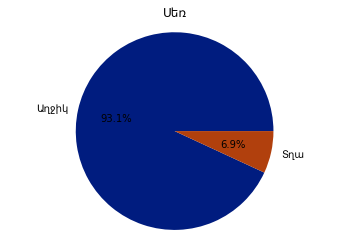

In [137]:
#Pie chart
data1 = pd.read_csv("Anzhela.csv")
counts = data1['Սեռ'].value_counts()
#colors = ['violet', 'slateblue']
plt.pie(counts, labels=counts.index,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Սեռ')
plt.show()

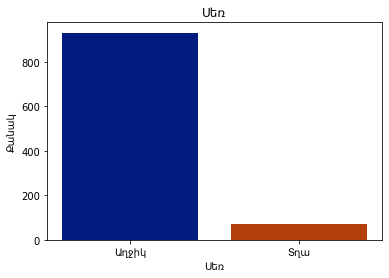

In [138]:
# Bar chart
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Սեռ')
plt.ylabel("Քանակ")
plt.title('Սեռ')
plt.show()

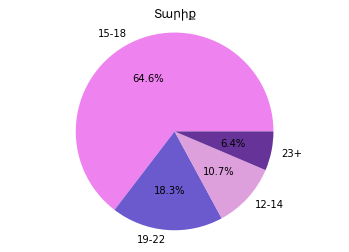

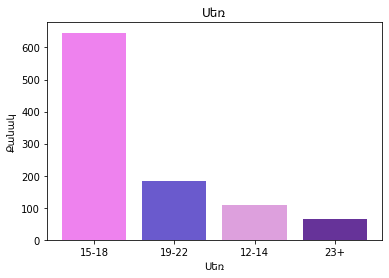

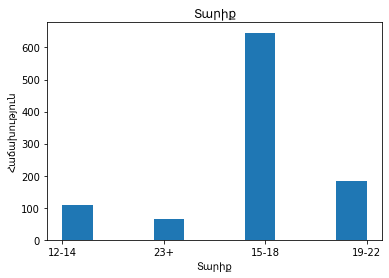

In [139]:
#Pie chart
data1 = pd.read_csv("Tariq.csv")
counts = data1['Տարիք'].value_counts()
colors = ['violet', 'slateblue',"plum","rebeccapurple"]
plt.pie(counts, labels=counts.index,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Տարիք')
plt.show()

#Bar chart
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Սեռ')
plt.ylabel("Քանակ")
plt.title('Սեռ')
plt.show()

# Histogram
plt.hist(data1['Տարիք'], bins=10)
plt.xlabel('Տարիք')
plt.ylabel('Հաճախություն')
plt.title('Տարիք')
plt.show()

# For now, we only worked on the most difficult part - cleaning up the Books and Authors, because users have inputted their information in different ways

#### Something like this

In [140]:
data.loc[[1,998, 100, 651, 638, 101, 104, 106,732, 122], "Հեղինակ 1":"Հեղինակ 10"]

,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
1,Томас Гарди,Драйзер,Франк Тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Hovhannes Tumanyan,Nar_dos,Avetiq Isahakyan,Hamo Sahyan,Daniel Varujan,NaN,NaN,NaN,NaN,NaN
100,Ագաթա Քրիստի,Արթուր Կոնան Դոյլ,Ալեքսանդր Դյումա,Պարույր Սևակ ։),Օ'Հենրի,Մարկ Տվեյն,Շեքսպիր,Շառլոթ Բրոնտե,Վահան Տերյան,Շիրվանզադե
651,Джон Грин,Տա Թևեր,Джоджо Мойес,Շիրվանզադե,Շեքսպիր,NaN,NaN,NaN,NaN,NaN
638,Բալզակ <>,Ջեյ Օսթին <>,Ջոն Գրին <>,Հենրի Հագարդ<>,Սթիվ Ջոբս,NaN,NaN,NaN,NaN,NaN
101,Jane Austin,J. K. Rowling,Charlotte Bronte,Louisa May Alcott,John Green,Oscar Wilde,NaN,NaN,NaN,NaN
104,Ջոն Գրին,Գ.Գ Մարկես,Կլոդ Սիմոն,Պաուլու Կոելյու,Ժան-Քրիստոֆ-Ռյուֆեն,NaN,NaN,NaN,NaN,NaN
106,Դժվարանում եմ առանձնացնել,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,«Ինձ պիոններ չնվիրես »😍,«Հավերժ քոնը»❤️,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Բալզակ,Մուրացան,Նար-Դոս,Թումանյան,Կաֆկա,Էլիֆ Շաֆակ,"Համո Սահյան, Վահան Տերյան",Մոպասան,Ռեմարկ,Ջեյն Օստեն


## As we can see 
## Latinatar hayeren, Դժվարանում եմ առանձնացնել, Պարույր Սևակ :), multiple languages,  or multiple authors on the same cell are inacceptable and should be removed

In [141]:
def remove_symbols(sentence):
    '''This code removes all the symbols and saves the pure text. It also keeps NaN-s.'''
    if(sentence is np.nan):
        return (np.nan)
    sentence = str(sentence)
    new_sentence = ""
    for symbol in sentence:
        if symbol.isalpha() or symbol.isnumeric() or symbol == " ":
            new_sentence += symbol
        else:
            new_sentence += " "
    string = ""
    for i in new_sentence.split():
        string += i + " "
    string = string.strip()
    return (string)

## Get the books and authors and remove unnecessary symbols and make everything lowercase for easier processing

In [142]:
books_authors = data.loc[:, "Գիրք 1" :]
books_authors.columns

Index(['Գիրք 1', 'Գիրք 2', 'Գիրք 3', 'Գիրք 4', 'Գիրք 5', 'Գիրք 6', 'Գիրք 7',
       'Գիրք 8', 'Գիրք 9', 'Գիրք 10', '_Գիրք 1_', '_Գիրք 2_', '_Գիրք 3_',
       '_Գիրք 4_', '_Գիրք 5_', '_Գիրք 6_', '_Գիրք 7_', '_Գիրք 8_', '_Գիրք 9_',
       '_Գիրք 10_', 'Հեղինակ 1', 'Հեղինակ 2', 'Հեղինակ 3', 'Հեղինակ 4',
       'Հեղինակ 5', 'Հեղինակ 6', 'Հեղինակ 7', 'Հեղինակ 8', 'Հեղինակ 9',
       'Հեղինակ 10'],
      dtype='object')

In [143]:
books_authors = books_authors.applymap(remove_symbols)
books_authors = books_authors.applymap(lambda string: string if string is np.nan else string.lower())

## As we can see all the unnecessary symbols are removed, for now it does not matter that some names are still in other languages or that first and last names are connected, because the upcoming functions will fix that for us

In [144]:
books_authors.head()

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
0,վ սարոյան,ս աղաջանյան,կ լաֆորետ,ա ալյեն,մ արեն,ա շիրվանզադե,լերմոնտով,ա դյումա,հ հեսսե,գ գ մարկես 100 տարվա մենություն,...,հերման հեսսե,վարդկես պետրոսյան,վիլյամ սարոյան,այդ ալյեն,NaN,NaN,NaN,NaN,NaN,NaN
1,один день,тесс из рода д эрбервиллей,жажда жизни,убик,пандемия,завтра,NaN,NaN,NaN,NaN,...,томас гарди,драйзер,франк тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,սերը ժանտախտի օրերին,NaN,NaN,ապրած և չապրած տարիներ,NaN,NaN,NaN,NaN,NaN,NaN,...,վարդգես պետրոսյան,հրաչյա մանուկյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,հայրենասեր օրիորդը,աստղերն են մեղավոր,քաոս,պատվի համար,731 օր քեզ համար,NaN,NaN,NaN,NaN,NaN,...,մուրացան,շիրվանզադե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ես և նա,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,գուրգեն մահարի,նար դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## This function creates a dictionary of Armenian letters and their latin "counterparts" and uses probability to convert Armenian text to Latin Armenian text, because for some letters such as "և" we have options "yev" and "ev"

In [145]:
import random

def random_choice(key, probability_of_val1):
    return key if random.random() < probability_of_val1 else 0

wordDict = {
    "ց": {"c": 0.8, "ts": 0.2},
    "ր": {"r": 1},
    "փ": {"p": 1},
    "օ": {"o": 1},
    "ք": {"q": 0.7, "k": 0.3},
    "և": {"ev": 0.7, "yev": 0.3},
    "ֆ": {"f": 1},
    "ՈՒ": {"U": 1},
    "Ու": {"U": 1},
    "ու": {"u": 1},
    "Ա": {"A": 1},
    "Գ": {"G": 1},
    "Բ": {"B": 1},
    "Ե": {"Ye": 0.1, "YE": 0.1, "E": 0.8},
    "Դ": {"D": 1},
    "Է": {"E": 1},
    "Զ": {"Z": 1},
    "Թ": {"T": 0.9, "Th": 0.05, "TH": 0.05},
    "Ը": {"Y": 0.35, "@": 0.45, "E": 0.2},
    "Ի": {"I": 1},
    "Ժ": {"ZH": 0.15, "J": 0.5, "Zh": 0.15, "G": 0.2},
    "Խ": {"Gh": 0.05, "X": 0.7, "Kh": 0.1, "KH": 0.1, "GH": 0.05},
    "Լ": {"L": 1},
    "Կ": {"K": 1},
    "Ծ": {"C": 0.3, "&": 0.1, "TS": 0.3, "Ts": 0.3},
    "Ձ": {"Dz": 0.4, "Z": 0.1, "DZ": 0.4, "D": 0.1},
    "Հ": {"H": 1},
    "Ճ": {"CH": 0.2, "Ch": 0.2, "J": 0.4, "Tch": 0.1, "C": 0.1},
    "Ղ": {"X": 0.5, "Gh": 0.25, "GH": 0.25},
    "Յ": {"Y": 0.9, "J": 0.1},
    "Մ": {"M": 1},
    "Շ": {"SH": 0.4, "Sh": 0.4, "S": 0.2},
    "Ն": {"N": 1},
    "Չ": {"4": 0.2, "CH": 0.3, "Ch": 0.4, "C": 0.1},
    "Ո": {"O": 1},
    "Ջ": {"Dj": 0.05, "J": 0.6, "DJ": 0.05, "G": 0.3},
    "Պ": {"P": 1},
    "Ս": {"S": 1},
    "Ռ": {"R": 1},
    "Տ": {"T": 1},
    "Վ": {"V": 1},
    "Ց": {"C": 0.8, "TS": 0.1, "Ts": 0.1},
    "Ր": {"R": 1},
    "Փ": {"P": 1},
    "Ւ": {"V": 1},
    "Օ": {"O": 1},
    "Ք": {"Q": 0.7, "K": 0.3},
    "Ֆ": {"F": 1},
    "ա": {"a": 1},
    "գ": {"g": 1},
    "բ": {"b": 1},
    "ե": {"ye": 0.2, "e": 0.8},
    "դ": {"d": 1},
    "է": {"e": 1},
    "զ": {"z": 1},
    "թ": {"t": 0.9, "th": 0.1},
    "ը": {"y": 0.35, "@": 0.45, "e": 0.2},
    "ի": {"i": 1},
    "ժ": {"j": 0.5, "zh": 0.3, "g": 0.2},
    "խ": {"x": 0.7, "kh": 0.2, "gh": 0.1},
    "լ": {"l": 1},
    "կ": {"k": 1},
    "ծ": {"c": 0.3, "ts": 0.6, "&": 0.1},
    "ձ": {"z": 0.1, "dz": 0.8, "d": 0.1},
    "հ": {"h": 1},
    "ճ": {"ch": 0.4, "c": 0.1, "j": 0.4, "tch": 0.1},
    "ղ": {"x": 0.5, "gh": 0.5},
    "յ": {"y": 0.9, "j": 0.1},
    "մ": {"m": 1},
    "շ": {"sh": 0.8, "s": 0.2},
    "ն": {"n": 1},
    "չ": {"4": 0.2, "ch": 0.7, "c": 0.1},
    "ո": {"o": 1},
    "ջ": {"j": 0.6, "dj": 0.1, "g": 0.3},
    "պ": {"p": 1},
    "ս": {"s": 1},
    "ռ": {"r": 1},
    "տ": {"t": 1},
    "վ": {"v": 1},
    "ւ": {"v": 1},
}
def Armenian_to_Latinatar(text):
    ''' This function bla bla bla blaaaaa '''
    second_key = " "
    mod_text = list(text)
    letter = 0;
    while letter != len(mod_text):       
        for (key, another_dict) in wordDict.items():
            try:
                if (mod_text[letter] == 'ո' and mod_text[letter+1] == 'ւ'):
                    mod_text = mod_text[:letter]+ ['u']+ mod_text[letter+2:]
                    break;
            except IndexError:
                break

            try:
                if(mod_text[letter] == 'Ո' and mod_text[letter+1] == 'Ւ'):
                    mod_text = mod_text[:letter]+ ['U']+ mod_text[letter+2:]
                    break;
            except IndexError:
                break
            if (mod_text[letter] == key):
                while(mod_text[letter] != second_key):     
                    for (second_key, value) in another_dict.items():
                        if (random_choice(second_key, value)):
                            mod_text[letter] = second_key                                
                            break;
            if (mod_text[letter] == second_key):
                break 
        letter += 1;
    return ''.join(mod_text)

In [146]:
Armenian_to_Latinatar("ԻՄ ԱՆՈՒՆԸ ԿԱՌԼեոն Է, դոն կառլեոնե")

'IM ANUNY KARLeon E, don karleone'

## This second function does the opposit, it converts the Latin Armenian text to Normal Armenian,  again we had to use probability for more precise convertion system

In [147]:
wordDict_2 = {
    "zh": {"ժ" : 1},
    "ch": {"չ" : 0.8, "ճ" : 0.2},
    "ts" : {"ծ" : 1},
    "c": {"ծ" : 0.5, "ց" : 0.4, "չ" : 0.1},
    "ev": {"և": 1},
    "ye": {"ե": 1},
    "th": {"թ" : 1},
    "kh": {"խ" : 1},
    "gh": {"ղ" : 1},
    "dz": {"ձ" : 1},
    "sh": {"շ" : 1},
    "vo" : {"ո" : 1},
    "dj" : {"ջ" : 1},
    "r" : {"ր" : 0.9, "ռ" : 0.1},
    "p": {"պ": 0.7, "փ": 0.3},
    "o": {"ո": 0.7, "օ" : 0.3},
    "q": {"ք": 1},
    "k": {"կ": 1},
    "f": {"ֆ": 1},
    "u": {"ու": 1},
    "a": {"ա": 1},
    "g": {"գ": 1},
    "b": {"բ": 1},
    "e": {"ե" : 0.7, "է" : 0.3},
    "d": {"դ": 1},
    "z": {"զ": 1},
    "t": {"տ" : 0.6, "թ": 0.4},
    "y" : {"յ" : 0.6, "ը" : 0.4},
    "@": {"ը" : 1},
    "i": {"ի": 1},
    "j": {"ջ" : 0.6, "ճ" : 0.2, "ժ" : 0.2},
    "x": {"խ" : 1},
    "l" : {"լ" : 1},
    "k": {"կ": 1},
    "h": {"հ": 1},
    "m": {"մ": 1},
    "n": {"ն": 1},
    "s": {"ս": 1},
    "v": {"վ": 1},
    "w": {"ու": 1}
}
def Latin_to_Armenian(text):
    #looping through single letter
    def loop(mod_text, letter, second_key):
        while(mod_text[letter] != second_key):     
            for (second_key, value) in another_dict.items():
                if (random_choice(second_key, value)):
                    mod_text[letter] = second_key
                    break;
    second_key = " "
    mod_text = list(text)
    letter = 0;
    while letter != len(mod_text):       
        for (key, another_dict) in wordDict_2.items():
            if (letter != len(mod_text) - 1):
                #For the cases with 2 letters
                if (mod_text[letter] + mod_text[letter+1] == key):
                    while((mod_text[letter] + mod_text[letter+1]) != second_key):     
                        for (second_key, value) in another_dict.items():
                            if (random_choice(second_key, value)):
                                mod_text[letter] = second_key
                                mod_text = mod_text[:letter+1] + mod_text[letter+2:]
                                second_key = mod_text[letter]
                                break;
                        if (mod_text[letter] == second_key):
                            break
                #For the case of a 1 letter
                elif (mod_text[letter] == key):
                    loop(mod_text, letter, second_key)
            else:
                if (mod_text[letter] == key):
                    loop(mod_text, letter, second_key)
            if (mod_text[letter] == second_key):
                break
        letter += 1;
    return ''.join(mod_text)

## As you can see, since the probability of having "տ" instead of "թ" is bigger, it appears more frequently in word "Տերյան"

In [148]:
for i in range(10):
    print(Latin_to_Armenian("Vahan Teryan".lower()))

վահան թերըան
վահան տէրըան
վահան տերյան
վահան տերյան
վահան տէրըան
վահան թերյան
վահան թերյան
վահան տերըան
վահան թերյան
վահան տերյան


## Now lets take sample from our dataset and try to convert it to Armenian

In [149]:
sample = books_authors.iloc[948:, :]
sample

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
948,raffi xent,gabriel sundukyan pepo,hasarakac vordegiry muracan,nar dos es ev na,NaN,NaN,NaN,NaN,NaN,NaN,...,vahan teryan,paruyr sevak,nar dos,hovhannes tunanyan,NaN,NaN,NaN,NaN,NaN,NaN
949,NaN,sherlock holmes,pride and prejudice,սամվել րաֆֆի,harry potter,NaN,NaN,NaN,NaN,NaN,...,j k rowling,վահան տերյան,րաֆֆի,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,սերը ժանտախտի օրերին,թքած ունենալու նուրբ արվեստը,սիրելու արվեստը,ուշքի արի աղջիկ ջան,սամվելը,NaN,NaN,NaN,NaN,NaN,...,գարսիա մարկես,էռնեստ հեմինգուեյ,հովհաննես շիրազ,շիրվանզադե,պարույր սևակ,եղիշե չարենց,NaN,NaN,NaN,NaN
951,հարրի փոթեր գրքաշարի բոլոր մասերը,փոքրիկ իշխանը,ռոբինզոն կրուզո,տասնհինգամյա նավապետը,ոսկե կիրճը,սպանված աղավնի,վերջին ուսուցիչը,պատվի համար,սպիտակ ժանիք,թումանյան հեքիաթներ,...,հովհաննես թումանյան,անտուան դը սենթ էքզյուպերի,նար դոս,դանիել դեֆֆո,ալեքսանդ դյումա,նար դոս,NaN,NaN,NaN,NaN
952,731 or qez hamar,tqac unenalu nurb arvesty,nar dos patmvacqner,caxkac pshalarer,dprocakan tariner,sevani apin,NaN,NaN,NaN,NaN,...,hovhannes tumanyan,nar dos,hamo sahyan,daniel varujan,avetiq isahakyan,NaN,NaN,NaN,NaN,NaN
953,քաոս,ապուշը,խրճիթը,несвятые святые,հմայված հոգին,ազնավուրը ազնավուրի մասին,աստվածաշունչ,հավասարում բազմաթիվ անհայտներով,հայկական էսքիզներ,իմ սիրտը լեռներում է,...,պարույրսևակ,համո սահյան,վարդգես պետրոսյան,հրանտ մաթևոսյան,ռոմեն ռոլան,դոստոևսկի,նիցշե,սարոյան,անահիտ սեկոյան,նարեկացի
954,demian,dandelion wine,the picture of dorian gray,the alchemist,the book thief,the diary of anne frank,NaN,NaN,NaN,NaN,...,herman hesse,john green,oscar wilde,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,ինձ պիոններ չնվիրես,քո մասին են պատմում ալիքները,աստղերն են մեղավոր,harry potter,մեծ տան փոքրիկ տիրուհին,NaN,NaN,NaN,NaN,NaN,...,ուիլյամ սարոյան,ռաֆայել նահապետյան,համո սահյան,գաբրիել գարսիա մարկես,լեոնիդ անդրեև,NaN,NaN,NaN,NaN,NaN
956,առանց ընտանիքի,այնտեղ որտեղ ծաղկում են վայրի վարդեր անատոլիակ...,երեք տարի անց նույն օրը,անլռելի զանգակատուն,մարդն ափի մեջ,NaN,NaN,NaN,NaN,NaN,...,պարույր սևակ,համո սահյան,հուսիկ արա,վիկտոր հյուգո,կաֆկա,NaN,NaN,NaN,NaN,NaN
957,հայրիկ դու խենթ ես,բռնիր ձեռքս ես վախենում,ապրած և չապրած տարիներ,հարրի փոթեր,NaN,NaN,NaN,NaN,NaN,NaN,...,գաբրիել գարսիա մարկես,նար դոս,ռեմարկ,վարդգես պետրոսյան,սյունե սևադա,մարկ մենսոն,դավիթ սամվելյան,NaN,NaN,NaN


In [150]:
dictionary = set(requests.get("https://raw.githubusercontent.com/dwyl/english-words/master/words_dictionary.json").json().keys())

def armenian_vs_english(sentence):
    if(sentence is np.nan):
        return (sentence)
    armenian = 0
    count = 0
    words = sentence.split()
    for i in words:
        if(len(i) <= 2):
            continue
        count += 1
        if int(i.lower() not in dictionary) == 1:
            armenian += 1
    english = count - armenian
#     print("Sentence is: ", sentence)
#     print("Armenian: ", armenian)
#     print("English: ", english)
#     print("Overall", count)
#     print("Relativeness", armenian/count)
    if armenian >= english:
        arm_version = Latin_to_Armenian(sentence)
#        print(arm_version)
        return(arm_version)
    else:
#        print(sentence)
        return(sentence)
#armenian_vs_english(" a latinatar banaaasaaa hayeren b c d hayeren")

In [154]:
sample

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
948,րաֆֆի խենթ,gabriel sundukyan pepo,հասարակած որդեգիրյ մուրացան,nar dos es ev na,NaN,NaN,NaN,NaN,NaN,NaN,...,վահան տերյան,պարույր սևակ,nar dos,հօվհաննես տունանյան,NaN,NaN,NaN,NaN,NaN,NaN
949,NaN,sherlock holmes,pride and prejudice,սամվել րաֆֆի,harry potter,NaN,NaN,NaN,NaN,NaN,...,ջ կ րոուլինգ,վահան տերյան,րաֆֆի,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,սերը ժանտախտի օրերին,թքած ունենալու նուրբ արվեստը,սիրելու արվեստը,ուշքի արի աղջիկ ջան,սամվելը,NaN,NaN,NaN,NaN,NaN,...,գարսիա մարկես,էռնեստ հեմինգուեյ,հովհաննես շիրազ,շիրվանզադե,պարույր սևակ,եղիշե չարենց,NaN,NaN,NaN,NaN
951,հարրի փոթեր գրքաշարի բոլոր մասերը,փոքրիկ իշխանը,ռոբինզոն կրուզո,տասնհինգամյա նավապետը,ոսկե կիրճը,սպանված աղավնի,վերջին ուսուցիչը,պատվի համար,սպիտակ ժանիք,թումանյան հեքիաթներ,...,հովհաննես թումանյան,անտուան դը սենթ էքզյուպերի,նար դոս,դանիել դեֆֆո,ալեքսանդ դյումա,նար դոս,NaN,NaN,NaN,NaN
952,731 որ քեզ համար,տքած ունենալու նուրբ արվեսթը,nar dos patmvacqner,ծախկած պշալարէր,դպրօծական տարիներ,սևանի ապին,NaN,NaN,NaN,NaN,...,հօվհաննես տումանըան,nar dos,համո սահյան,դանիել վարուջան,ավեթիք իսահակյան,NaN,NaN,NaN,NaN,NaN
953,քաոս,ապուշը,խրճիթը,несвятые святые,հմայված հոգին,ազնավուրը ազնավուրի մասին,աստվածաշունչ,հավասարում բազմաթիվ անհայտներով,հայկական էսքիզներ,իմ սիրտը լեռներում է,...,պարույրսևակ,համո սահյան,վարդգես պետրոսյան,հրանտ մաթևոսյան,ռոմեն ռոլան,դոստոևսկի,նիցշե,սարոյան,անահիտ սեկոյան,նարեկացի
954,դեմիան,dandelion wine,the picture of dorian gray,the alchemist,the book thief,the diary of anne frank,NaN,NaN,NaN,NaN,...,հեռման հեսսե,john green,ոսծար ուիլդե,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,ինձ պիոններ չնվիրես,քո մասին են պատմում ալիքները,աստղերն են մեղավոր,harry potter,մեծ տան փոքրիկ տիրուհին,NaN,NaN,NaN,NaN,NaN,...,ուիլյամ սարոյան,ռաֆայել նահապետյան,համո սահյան,գաբրիել գարսիա մարկես,լեոնիդ անդրեև,NaN,NaN,NaN,NaN,NaN
956,առանց ընտանիքի,այնտեղ որտեղ ծաղկում են վայրի վարդեր անատոլիակ...,երեք տարի անց նույն օրը,անլռելի զանգակատուն,մարդն ափի մեջ,NaN,NaN,NaN,NaN,NaN,...,պարույր սևակ,համո սահյան,հուսիկ արա,վիկտոր հյուգո,կաֆկա,NaN,NaN,NaN,NaN,NaN
957,հայրիկ դու խենթ ես,բռնիր ձեռքս ես վախենում,ապրած և չապրած տարիներ,հարրի փոթեր,NaN,NaN,NaN,NaN,NaN,NaN,...,գաբրիել գարսիա մարկես,նար դոս,ռեմարկ,վարդգես պետրոսյան,սյունե սևադա,մարկ մենսոն,դավիթ սամվելյան,NaN,NaN,NaN


In [152]:
sample = sample.applymap(armenian_vs_english)
sample

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
948,րաֆֆի խենթ,gabriel sundukyan pepo,հասարակած որդեգիրյ մուրացան,nar dos es ev na,NaN,NaN,NaN,NaN,NaN,NaN,...,վահան տերյան,պարույր սևակ,nar dos,հօվհաննես տունանյան,NaN,NaN,NaN,NaN,NaN,NaN
949,NaN,sherlock holmes,pride and prejudice,սամվել րաֆֆի,harry potter,NaN,NaN,NaN,NaN,NaN,...,ջ կ րոուլինգ,վահան տերյան,րաֆֆի,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,սերը ժանտախտի օրերին,թքած ունենալու նուրբ արվեստը,սիրելու արվեստը,ուշքի արի աղջիկ ջան,սամվելը,NaN,NaN,NaN,NaN,NaN,...,գարսիա մարկես,էռնեստ հեմինգուեյ,հովհաննես շիրազ,շիրվանզադե,պարույր սևակ,եղիշե չարենց,NaN,NaN,NaN,NaN
951,հարրի փոթեր գրքաշարի բոլոր մասերը,փոքրիկ իշխանը,ռոբինզոն կրուզո,տասնհինգամյա նավապետը,ոսկե կիրճը,սպանված աղավնի,վերջին ուսուցիչը,պատվի համար,սպիտակ ժանիք,թումանյան հեքիաթներ,...,հովհաննես թումանյան,անտուան դը սենթ էքզյուպերի,նար դոս,դանիել դեֆֆո,ալեքսանդ դյումա,նար դոս,NaN,NaN,NaN,NaN
952,731 որ քեզ համար,տքած ունենալու նուրբ արվեսթը,nar dos patmvacqner,ծախկած պշալարէր,դպրօծական տարիներ,սևանի ապին,NaN,NaN,NaN,NaN,...,հօվհաննես տումանըան,nar dos,համո սահյան,դանիել վարուջան,ավեթիք իսահակյան,NaN,NaN,NaN,NaN,NaN
953,քաոս,ապուշը,խրճիթը,несвятые святые,հմայված հոգին,ազնավուրը ազնավուրի մասին,աստվածաշունչ,հավասարում բազմաթիվ անհայտներով,հայկական էսքիզներ,իմ սիրտը լեռներում է,...,պարույրսևակ,համո սահյան,վարդգես պետրոսյան,հրանտ մաթևոսյան,ռոմեն ռոլան,դոստոևսկի,նիցշե,սարոյան,անահիտ սեկոյան,նարեկացի
954,դեմիան,dandelion wine,the picture of dorian gray,the alchemist,the book thief,the diary of anne frank,NaN,NaN,NaN,NaN,...,հեռման հեսսե,john green,ոսծար ուիլդե,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,ինձ պիոններ չնվիրես,քո մասին են պատմում ալիքները,աստղերն են մեղավոր,harry potter,մեծ տան փոքրիկ տիրուհին,NaN,NaN,NaN,NaN,NaN,...,ուիլյամ սարոյան,ռաֆայել նահապետյան,համո սահյան,գաբրիել գարսիա մարկես,լեոնիդ անդրեև,NaN,NaN,NaN,NaN,NaN
956,առանց ընտանիքի,այնտեղ որտեղ ծաղկում են վայրի վարդեր անատոլիակ...,երեք տարի անց նույն օրը,անլռելի զանգակատուն,մարդն ափի մեջ,NaN,NaN,NaN,NaN,NaN,...,պարույր սևակ,համո սահյան,հուսիկ արա,վիկտոր հյուգո,կաֆկա,NaN,NaN,NaN,NaN,NaN
957,հայրիկ դու խենթ ես,բռնիր ձեռքս ես վախենում,ապրած և չապրած տարիներ,հարրի փոթեր,NaN,NaN,NaN,NaN,NaN,NaN,...,գաբրիել գարսիա մարկես,նար դոս,ռեմարկ,վարդգես պետրոսյան,սյունե սևադա,մարկ մենսոն,դավիթ սամվելյան,NaN,NaN,NaN


# We are also currently working on creating a function that would give us relative similarity between to strings so that we can convert

# 1. վ տերյան
# 2. վահան Թերյան
# 3. Վահան Տերյան
# 4. Թերյան Վահան

# Into a single Վահան Տերյան

# SOME DRAFT CODES

### Jaccard distance does not work well enough

In [1017]:
# def jaccard_distance(s, t):
#     set_s = set(s)
#     set_t = set(t)
#     return len(set_s.intersection(set_t)) / len(set_s.union(set_t))

# # Example usage
# s1 = "պարույր սևակ".lower()
# s2 = "օսկար ուայլդ".lower()
# distance = jaccard_distance(s1, s2)
# print(distance) # Output: 0.5

# authors_data = data.loc[:, 'Հեղինակ 1' : 'Հեղինակ 10']

# arr = authors_data.values.flatten()



# authors_series = pd.Series(arr).value_counts()
# authors_series = authors_series.iloc[1:]
# authors_series = authors_series[authors_series > 2]
# authors_series

# author_names = pd.Series(authors_series.index)

# author_names

# frequent_names = author_names.apply(lambda name: jaccard_distance(name, "պարույր սևակ")).sort_values(ascending=False).head(10).index

# author_names.iloc[frequent_names]

In [155]:
import Levenshtein as lev

In [156]:
sample = books_authors.iloc[990:,:]
sample

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
990,,,,,,,,,NaN,NaN,...,վարդգես պետրոսյան,նար դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,վարդգես պետրոսյան ապրած և չապրած տարիներ,մուսա լեռաբ քառասուն օրը,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,հովհ թումանյան,վահան տերյան,սերո խանզադյան,վարդգես պետրոսյան,պարույր սևակ,NaN,NaN,NaN,NaN,NaN
992,բռնիր ձեռքս ես վախենում եմ,աստղերն են մեղավոր,չգտնված երիցուկներ,քաոս,պատվի համար,վերջին ուսուցիչ,ապրած և չապրած տարիներ,NaN,NaN,NaN,...,ջոն գրին,շիրվանզադե,արմեն նիազյան,տերյան,սևակ,NaN,NaN,NaN,NaN,NaN
993,արտիստը,վարդանանք,գևորգ մարզպետունի,731օր քեզ համար և առանց քեզ,NaN,NaN,NaN,NaN,NaN,NaN,...,եղիշե չարենց,վահան տերյան,շիրվանզադե,մուրացան,NaN,NaN,NaN,NaN,NaN,NaN
994,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ջոն գրին,վարդգես պետրոսյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,աննա կարենինա,շահմարի առեղծվածը,ասկանիո,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,դյումա,հեսսե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,ժորժ սանդ ինդիանա,պիեդրա գետի ափին նստեցի ու լաց եղա,451աստիճան ըստ ֆարենհայթի,փոքրիկ իշխանը,սպանված աղավնին,NaN,NaN,NaN,NaN,NaN,...,վարդգես պետրոսյան,ժորժ սանդ,շիրվանզադե,վահան տերյան,պաուլո կուելիո,NaN,NaN,NaN,NaN,NaN
997,մարկ արեն,selinger,օրհան փամուք,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,չունեմ սիրած հեղինակներ որպես այդպիսին,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,nar dos patmvacqner,dprocakan tariner,caxkac pshalarer,hovhannes tumanyan patmvacqner,NaN,NaN,NaN,NaN,NaN,NaN,...,hovhannes tumanyan,nar dos,avetiq isahakyan,hamo sahyan,daniel varujan,NaN,NaN,NaN,NaN,NaN
999,պարույր սևակ,համո սահյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,պարույր սևակ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
word_to_compare = 'hովհաննես թումանյան'

# Define the maximum allowed Levenshtein distance
max_distance = 7

# Define a function to calculate the Levenshtein distance between two words
def calculate_distance(real_word, word_to_compare):
    if(lev.distance(real_word, word_to_compare) <= 6):
        return (word_to_compare)
    return(real_word)

for column in sample.columns:
    sample.loc[:,column] = sample[column].apply(lambda name: calculate_distance(name, word_to_compare))

TypeError: object of type 'float' has no len()

In [158]:
sample

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
990,,,,,,,,,NaN,NaN,...,վարդգես պետրոսյան,նար դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,վարդգես պետրոսյան ապրած և չապրած տարիներ,մուսա լեռաբ քառասուն օրը,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,հովհ թումանյան,վահան տերյան,սերո խանզադյան,վարդգես պետրոսյան,պարույր սևակ,NaN,NaN,NaN,NaN,NaN
992,բռնիր ձեռքս ես վախենում եմ,աստղերն են մեղավոր,չգտնված երիցուկներ,քաոս,պատվի համար,վերջին ուսուցիչ,ապրած և չապրած տարիներ,NaN,NaN,NaN,...,ջոն գրին,շիրվանզադե,արմեն նիազյան,տերյան,սևակ,NaN,NaN,NaN,NaN,NaN
993,արտիստը,վարդանանք,գևորգ մարզպետունի,731օր քեզ համար և առանց քեզ,NaN,NaN,NaN,NaN,NaN,NaN,...,եղիշե չարենց,վահան տերյան,շիրվանզադե,մուրացան,NaN,NaN,NaN,NaN,NaN,NaN
994,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ջոն գրին,վարդգես պետրոսյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,աննա կարենինա,շահմարի առեղծվածը,ասկանիո,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,դյումա,հեսսե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,ժորժ սանդ ինդիանա,պիեդրա գետի ափին նստեցի ու լաց եղա,451աստիճան ըստ ֆարենհայթի,փոքրիկ իշխանը,սպանված աղավնին,NaN,NaN,NaN,NaN,NaN,...,վարդգես պետրոսյան,ժորժ սանդ,շիրվանզադե,վահան տերյան,պաուլո կուելիո,NaN,NaN,NaN,NaN,NaN
997,մարկ արեն,selinger,օրհան փամուք,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,չունեմ սիրած հեղինակներ որպես այդպիսին,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,nar dos patmvacqner,dprocakan tariner,caxkac pshalarer,hovhannes tumanyan patmvacqner,NaN,NaN,NaN,NaN,NaN,NaN,...,hovhannes tumanyan,nar dos,avetiq isahakyan,hamo sahyan,daniel varujan,NaN,NaN,NaN,NaN,NaN
999,պարույր սևակ,համո սահյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,պարույր սևակ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
from googletrans import Translator

In [213]:
translator = Translator()



In [218]:
translation = translator.translate('Արմեն Մկրտումյան', dest='en')
print(translation.text)

Armen Mkrtumyan


In [1025]:
%conda install -U deep-translator


usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: -U

Note: you may need to restart the kernel to use updated packages.


In [1026]:
from deep_translator import GoogleTranslator

ModuleNotFoundError: No module named 'deep_translator'

In [159]:
import googletrans
googletrans.LANGUAGES


{'af': 'afrikaans',
 'sq': 'albanian',
 'am': 'amharic',
 'ar': 'arabic',
 'hy': 'armenian',
 'az': 'azerbaijani',
 'eu': 'basque',
 'be': 'belarusian',
 'bn': 'bengali',
 'bs': 'bosnian',
 'bg': 'bulgarian',
 'ca': 'catalan',
 'ceb': 'cebuano',
 'ny': 'chichewa',
 'zh-cn': 'chinese (simplified)',
 'zh-tw': 'chinese (traditional)',
 'co': 'corsican',
 'hr': 'croatian',
 'cs': 'czech',
 'da': 'danish',
 'nl': 'dutch',
 'en': 'english',
 'eo': 'esperanto',
 'et': 'estonian',
 'tl': 'filipino',
 'fi': 'finnish',
 'fr': 'french',
 'fy': 'frisian',
 'gl': 'galician',
 'ka': 'georgian',
 'de': 'german',
 'el': 'greek',
 'gu': 'gujarati',
 'ht': 'haitian creole',
 'ha': 'hausa',
 'haw': 'hawaiian',
 'iw': 'hebrew',
 'he': 'hebrew',
 'hi': 'hindi',
 'hmn': 'hmong',
 'hu': 'hungarian',
 'is': 'icelandic',
 'ig': 'igbo',
 'id': 'indonesian',
 'ga': 'irish',
 'it': 'italian',
 'ja': 'japanese',
 'jw': 'javanese',
 'kn': 'kannada',
 'kk': 'kazakh',
 'km': 'khmer',
 'ko': 'korean',
 'ku': 'kurdish 

In [176]:
authors = pd.read_csv('final_dataset.csv')['name']
type(authors)

pandas.core.series.Series

In [210]:
authors.head(5)

0          Jason   Wallace
1             Rosan Hollak
2               Nanna Foss
3        Terri Savelle Foy
4    Vishwas Nangare Patil
Name: name, dtype: object

In [163]:
authors[authors.str.contains("Timothy Zahn")]

201017    Timothy Zahn
Name: name, dtype: object

In [164]:
books_authors.shape

(1000, 30)

In [173]:
dictionary

{'iterating',
 'biopoesis',
 'parahormone',
 'stylists',
 'pleaders',
 'uncurl',
 'calorimeter',
 'unbendingly',
 'hurraying',
 'dentaphone',
 'inescate',
 'seskin',
 'lonchopteridae',
 'earthsmoke',
 'zingana',
 'bunting',
 'duckers',
 'inhabile',
 'hoopoo',
 'perioptometry',
 'clipboards',
 'victimized',
 'setae',
 'bedawn',
 'lancinated',
 'trillion',
 'detacher',
 'forborne',
 'meltdowns',
 'dents',
 'victor',
 'eastwards',
 'lrecl',
 'fishworm',
 'puriri',
 'sensualities',
 'eyrie',
 'cornua',
 'dawsonite',
 'bolding',
 'micrencephalia',
 'combatively',
 'semiticize',
 'lingonberries',
 'ichnolitic',
 'therehence',
 'wellaways',
 'cornrows',
 'seeingly',
 'standout',
 'consultative',
 'sfoot',
 'tormentors',
 'vivary',
 'comradeliness',
 'brutish',
 'recentralized',
 'unstressedly',
 'granary',
 'pterostigmal',
 'roomette',
 'octahedrical',
 'altitudinous',
 'seamiest',
 'angioid',
 'galoping',
 'slab',
 'sleighing',
 'iberia',
 'parto',
 'greenboard',
 'reintercede',
 'essentiali

In [172]:
array = books_authors.values.flatten()
english_array= []
for element in array:
    if(convert_to_armenian(element)):
        english_array.append(element)
        #print(element)
for i in english_array:
    print("Original: ", i)
    print("Converted: ", armenian_vs_english(i))
    print()
    print()

Original:  spencer johnson who moved my cheese 2րդ անգամ արդեն
Converted:  spencer johnson who moved my cheese 2րդ անգամ արդեն


Original:  daniel goleman emotional intelligence
Converted:  daniel goleman emotional intelligence


Original:  spencer johnson
Converted:  spencer johnson


Original:  ken blanchard
Converted:  կեն բլանչարդ


Original:  stephen r covey
Converted:  stephen r covey


Original:  nardosi es ev na
Converted:  նարդօսի ես և նա


Original:  vardkes petrosyani dexatan anin
Converted:  վարդկես փետրոսըանի դեխատան անին


Original:  brnir im dzerqy es vaxenum em
Converted:  բրնիր իմ ձերքյ ես վախենում եմ


Original:  rome and juliet
Converted:  rome and juliet


Original:  hari poter
Converted:  հարի պոտեր


Original:  spanvanc axavnin
Converted:  սպանվանց ախավնին


Original:  edgar harutyunyan
Converted:  եդգար հարուտյունյան


Original:  edgar po
Converted:  edgar po


Original:  mark twain
Converted:  mark twain


Original:  harry potter
Converted:  harry potter


Origi

In [167]:
def calculate_distance(word_to_compare, real_word):
    if (word_to_compare[-1] == "ե" or word_to_compare[-1] == 'է'):
        word_to_compare = word_to_compare[:-1]
    dist = lev.distance(word_to_compare, real_word,  weights=(1, 0, 1))
    print("distance: ", dist)
    if(lev.distance(word_to_compare, real_word,  weights=(1, 0, 1)) <= 6):
        return (real_word)
    return(word_to_compare)

string_1 = "վահան տոտովենծ"
string_2 = "վահան տերյան"
print(calculate_distance(string_1, string_2))

distance:  3
վահան տերյան


In [168]:
import re 

def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

has_cyrillic(books_authors.loc[1][1])
#has_cyrillic("ARMEN")

True

In [169]:
import re

def convert_to_armenian(word):
    if (word is np.nan):
        return(0)
    if(re.search('[a-zA-Z]', word) != None):
        return 1
    return(0)


In [170]:
array = books_authors.values.flatten()
for element in array:
    if(not convert_to_armenian(element)):
        print(element)

վ սարոյան
ս աղաջանյան
կ լաֆորետ
ա ալյեն
մ արեն
ա շիրվանզադե
լերմոնտով
ա դյումա
հ հեսսե
գ գ մարկես 100 տարվա մենություն
ստենդալ կարմիրը եւ սեւը
միխայիլ բուլգակով վարպետն ու մա րգարիտան
nan
nan
nan
nan
nan
nan
nan
nan
հերման հեսսե
վարդկես պետրոսյան
վիլյամ սարոյան
այդ ալյեն
nan
nan
nan
nan
nan
nan
один день
тесс из рода д эрбервиллей
жажда жизни
убик
пандемия
завтра
nan
nan
nan
nan
дом в котором
бегущая с волками
к востоку от эдема
nan
nan
nan
nan
nan
nan
nan
томас гарди
драйзер
франк тилье
nan
nan
nan
nan
nan
nan
nan
սերը ժանտախտի օրերին
nan
nan
ապրած և չապրած տարիներ
nan
nan
nan
nan
nan
nan
փոխիր կյանքդ
բռնիր ձեռքս ես վախենում եմ
731 օր քեզ համար
չգտնված երիցուկներ
կախվածություն
զոլավոր գիծերազգեստով տղան
կամքի ուժ
մտածել ինչպես շեռլոկը
այնտեղ որտեղ ծաղկում են վայրի վարդեր
աստղերն են մեղավոր
վարդգես պետրոսյան
հրաչյա մանուկյան
nan
nan
nan
nan
nan
nan
nan
nan
հայրենասեր օրիորդը
աստղերն են մեղավոր
քաոս
պատվի համար
731 օր քեզ համար
nan
nan
nan
nan
nan
աղջիկ ջան մի արդարացիր
ինձ պիոններ չնվի

In [171]:
russian_authors = pd.read_csv('list_of_russian_authors.csv')
russian_authors

,0
0,Джен Синсеро
1,"Александр Снегирёв',"
2,"Анастасия Ивановна Цветаева',"
3,Анна Кирьянова
4,"Астахова, Ах',"
...,...
114,Элиас Лённрот
115,Тихон
116,Майк Омер
117,София Лундберг
